<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231011_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝
    - sklearn

        데이터 분리 : 훈련, 검증, 테스트 (K-Fold, cross_val_score)

        하이퍼파라미터 : GridSearchCV

    - 평가

        정확도, 오차행렬

        정밀도, 재현율

        F1 스코어, ROC 곡선, AUC
    - 분류

        결정트리

        랜덤포레스트(앙상블)
        
        XGBoost

        SVM

    - 회귀

        선형회귀

        다항회귀

        릿지, 라쏘, 엘라스틱넷

        로지스틱회귀

    - 차원축소 / 군집

        pca

        KMeans

        군집평가, DBSCAN

    - 텍스트 처리

        NLP, BOW

        텍스트 분류

        감성분석

        문서유사도

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, precision_recall_curve

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print(confusion, accuracy, precision, recall)

In [ ]:
from sklearn.preprocessing import Binarizer

def get_eval_binar(thresholds, y_tests, pred_probas):
    binar = Binarizer(threshold=thresholds)
    y_binar = binar.fit_transform(pred_probas)
    print("## ", thresholds, ' : ')
    get_clf_eval(y_tests, y_binar[:,1])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df


def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df


def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
titanic = pd.read_csv('./drive/MyDrive/data/titanic_train.csv')

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
y_titanic = titanic.Survived
X_titanic = titanic.drop('Survived', axis=1)

In [ ]:
X_titanic = transform_features(X_titanic)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=2)

In [ ]:
lr_clf = LogisticRegression(max_iter=5000, random_state=2)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

[[88 12]
 [28 51]] 0.776536312849162 0.8095238095238095 0.6455696202531646


In [ ]:
pred_proba = lr_clf.predict_proba(X_test)

In [ ]:
pred_proba

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(y_test, pred)
f1

0.7183098591549295

In [ ]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print(confusion, np.round(accuracy,3), np.round(precision,3), np.round(recall,3), np.round(f1,3))

In [ ]:
thresholds = [0.40, 0.45, 0.50, 0.55, 0.60]

In [ ]:
def get_eval_binar(thresholds, y_tests, pred_probas):
    binar = Binarizer(threshold=thresholds)
    y_binar = binar.fit_transform(pred_probas)
    print("## ", thresholds, ' : ')
    get_clf_eval(y_tests, y_binar[:,1])

In [ ]:
pred_proba = lr_clf.predict_proba(X_test)
for i in thresholds:
    get_eval_binar(i, y_test, pred_proba)

##  0.4  : 
[[84 16]
 [25 54]] 0.771 0.771 0.684 0.725
##  0.45  : 
[[84 16]
 [26 53]] 0.765 0.768 0.671 0.716
##  0.5  : 
[[88 12]
 [28 51]] 0.777 0.81 0.646 0.718
##  0.55  : 
[[92  8]
 [33 46]] 0.771 0.852 0.582 0.692
##  0.6  : 
[[95  5]
 [35 44]] 0.777 0.898 0.557 0.688


#ROC, AUC

ROC = Receiver Operation Characteristic

AUC = Area under the curve

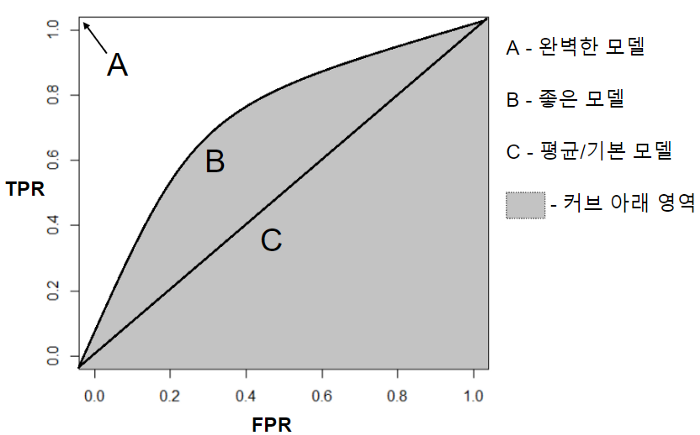

FPR = False positive rate

TPR = True positive rate

TPR = TP / (TP+FN) = recall

    FN = 0,  TPR = 1

TNR = TN / (TN+FP) = specificity

    FP = 0, TNR = 1

FPR = FP / (TN+FP) = 1- TNR

    FP = 0, FPR = 0

$$
{TN+FP \over TN+FP} - {TN \over TN+FP} = 1 - TNR
$$

In [ ]:
from sklearn.metrics import roc_curve

roc_curve 입력값 : y_test, 1(=positive)의 확률

roc_curve 출력값 : fpr, tpr, thresholds

In [ ]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

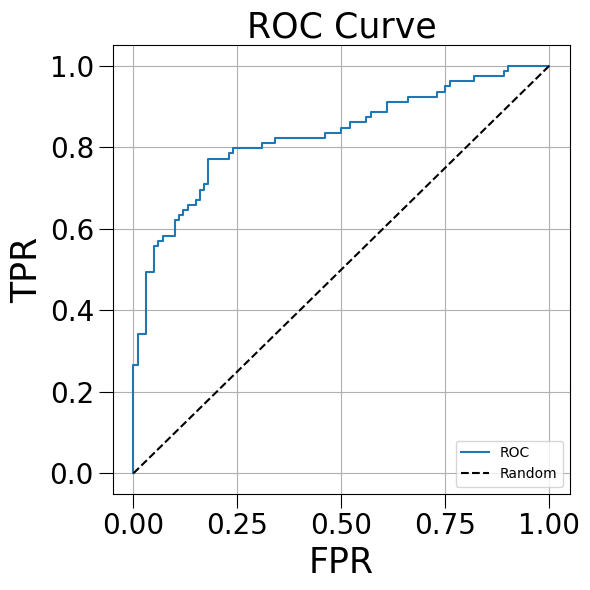

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(fprs, tprs, label = "ROC")
plt.plot([0,1],[0,1], 'k--', label = 'Random')
plt.xlabel('FPR',fontsize=25)
plt.ylabel('TPR',fontsize=25)
plt.tick_params(length=10, labelsize=20)
plt.title('ROC Curve',fontsize=25)
plt.tight_layout()
plt.grid()
plt.legend(loc='lower right')

In [ ]:
from sklearn.metrics import roc_auc_score

r_aucs = roc_auc_score(y_test, pred_proba_class1)

In [ ]:
r_aucs

0.829620253164557

In [ ]:
def get_clf_eval(y_test, pred, pred_probas=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_aucs = roc_auc_score(y_test, pred_probas)
    print(confusion, np.round(accuracy,3), np.round(precision,3), np.round(recall,3), np.round(f1,3), roc_aucs)

In [ ]:
get_clf_eval(y_test, pred, pred_proba_class1)

[[88 12]
 [28 51]] 0.777 0.81 0.646 0.718 0.829620253164557


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
X_features = cancer.data
y_label = cancer.target
cancer_df = pd.DataFrame(X_features, columns=cancer.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
cancer_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

모델 LogisticRegression(max_iter=5000)

accuracy, precision, recall, f1, roc_auc 구하기

DecisionTreeClassifier

RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.3, random_state=156)

In [ ]:
lr_clf = LogisticRegression(max_iter=5000)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test, pred, pred_proba)

[[ 46  10]
 [  5 110]] 0.912 0.917 0.957 0.936 0.9835403726708074


In [ ]:
def get_clf_eval(y_test, pred, pred_probas=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_aucs = None
    if pred_probas is not None:
        roc_aucs = roc_auc_score(y_test, pred_probas)
    print(confusion, np.round(accuracy,3), np.round(precision,3), np.round(recall,3), np.round(f1,3), roc_aucs)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_clf = DecisionTreeClassifier()

In [ ]:
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
get_clf_eval(y_test, pred)

[[ 48   8]
 [  5 110]] 0.924 0.932 0.957 0.944 None


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
get_clf_eval(y_test, pred)

[[ 49   7]
 [  4 111]] 0.936 0.941 0.965 0.953 None


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators':[100,200,300], 'max_depth':[6, 8, 10, 12],
          'min_samples_split':[8, 16, 20]}

In [ ]:
rf = RandomForestClassifier(random_state=156, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=3, n_jobs=-1, refit=True)
grid_cv.fit(X_train, y_train)
grid_cv.best_params_

{'max_depth': 6, 'min_samples_split': 8, 'n_estimators': 200}

In [ ]:
grid_cv.best_score_
pred = grid_cv.best_estimator_.predict(X_test)
accuracy_score(y_test, pred)

0.935672514619883

In [ ]:
ftr_importance_values = grid_cv.best_estimator_.feature_importances_

In [ ]:
ftr_importance_values

array([0.03541061, 0.00863743, 0.03545619, 0.06847153, 0.00386138,
       0.01585356, 0.04380072, 0.09140229, 0.0029362 , 0.0020275 ,
       0.01635635, 0.00251688, 0.01251901, 0.03532375, 0.00244944,
       0.00177143, 0.00319941, 0.00288211, 0.00276888, 0.00195943,
       0.15033374, 0.01423285, 0.14352487, 0.09765035, 0.00877281,
       0.02063715, 0.02929653, 0.12392932, 0.01303485, 0.00898342])

In [ ]:
ftr_importance = pd.Series(ftr_importance_values, index=cancer.feature_names)

In [ ]:
ftr_importance

In [ ]:
import seaborn as sns

<Axes: >

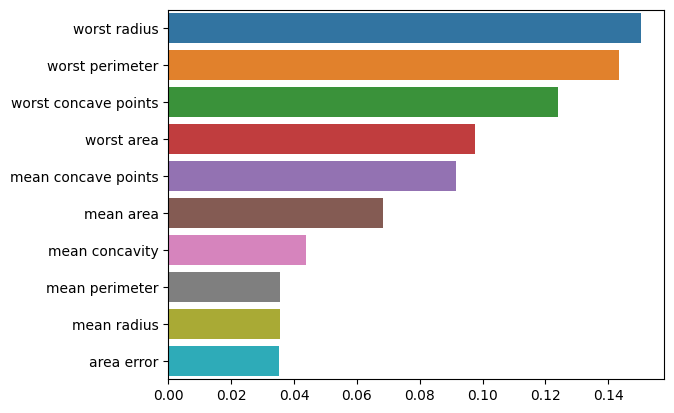

In [ ]:
ftr_10 = ftr_importance.sort_values(ascending=False)[:10]
sns.barplot(x=ftr_10, y=ftr_10.index)

In [ ]:
ls ./drive/MyDrive/data/dia*

./drive/MyDrive/data/diabetes.csv


In [ ]:
diabetes = pd.read_csv('./drive/MyDrive/data/diabetes.csv')

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

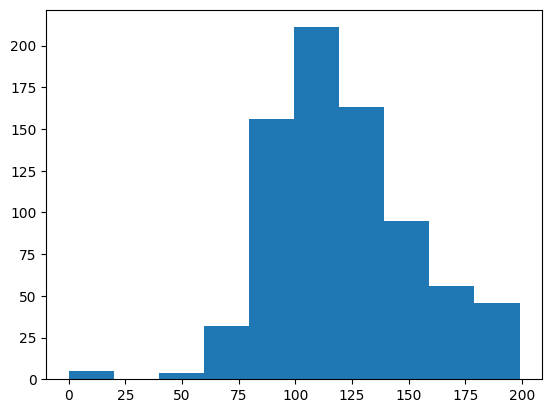

In [ ]:
plt.hist(diabetes['Glucose'], bins=10)

In [ ]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

Glucose 예 : 5개 0 이다. 5/768 * 100

In [ ]:
total_count = diabetes['Glucose'].count()

In [ ]:
total_count

768

In [ ]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']
def zero_check(zero_features):
    for feature in zero_features:
        zero_count = diabetes[diabetes[feature]==0][feature].count()
        total_count = diabetes[feature].count()
        zero_rate = np.round((zero_count/total_count)*100,2)
        print(feature,' : ', zero_rate,'%')

zero_check(zero_features)

Glucose  :  0.65 %
BloodPressure  :  4.56 %
SkinThickness  :  29.56 %
Insulin  :  48.7 %
BMI  :  1.43 %


In [ ]:
diabetes[diabetes['Glucose']==0]['Glucose'].count()

5

In [ ]:
mean_zero = diabetes[zero_features].mean()

In [ ]:
mean_zero

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [ ]:
diabetes[zero_features] = diabetes[zero_features].replace(0, mean_zero)

In [ ]:
zero_check(zero_features)

Glucose  :  0.0 %
BloodPressure  :  0.0 %
SkinThickness  :  0.0 %
Insulin  :  0.0 %
BMI  :  0.0 %


In [ ]:
X = diabetes.iloc[:, :-1]
y_label = diabetes.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.2, random_state= 156, stratify=y_label)

In [ ]:
lr_clf = LogisticRegression(max_iter=5000)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test, pred, pred_proba)

[[90 10]
 [21 33]] 0.799 0.767 0.611 0.68 0.8453703703703703


StandardScaler, MinMaxScaler

사용

전체 X 데이터를 모두 변환 후에 train_test_split 으로 나눠서

분류를 하기. get_clf_eval 함수를 사용하여 평가

In [ ]:
def fit_predict_eval(X_train, y_train, X_test, y_test):
    lr_clf = LogisticRegression(max_iter=5000)
    lr_clf.fit(X_train, y_train)
    pred = lr_clf.predict(X_test)
    pred_proba = lr_clf.predict_proba(X_test)[:, 1]
    get_clf_eval(y_test, pred, pred_proba)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_mms, y_label, test_size=0.2, random_state= 156, stratify=y_label)

In [ ]:
fit_predict_eval(X_train, y_train, X_test, y_test)

[[90 10]
 [21 33]] 0.799 0.767 0.611 0.68 0.8487037037037037


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y_label, test_size=0.2, random_state= 156, stratify=y_label)

In [ ]:
fit_predict_eval(X_train, y_train, X_test, y_test)

[[90 10]
 [21 33]] 0.799 0.767 0.611 0.68 0.8433333333333334


# 결정 트리

- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 분류 규칙을 만들고, 트리 형태로 분류 된 구조를 만들어 내는 것입니다.

- 규칙을 가장 쉽게 표현 하는 방법으로 if / else 를 사용하여 표현 하는 것 입니다.

-  즉, if / else 기준을 데이터로 부터 자동으로 찾아내, 예측을 위한 규측을 만드는 알고리즘

- 알고리즘 성능 : 규칙을 어떻게 만드냐가 결정


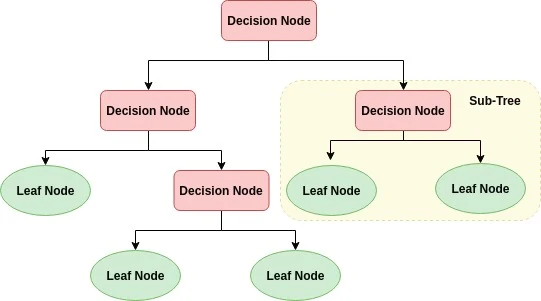

- Decision Node : 규칙 조건

- Leaf Node : 결정된 분류(클래스) 값

- 서브 트리 : 새로운 규칙이 추가 되면 그 밑에 작은 나무 구조가 덧 붙여 진다.

규칙 만드는 사례

    노랑레고 : 모두 동그라미

    파랑레고 : 동그라미, 세모, 네모

지니계수, 엔트로피

## 지니 계수
<파이썬을 이용한 빅데이터 분석, 유성준 외, 21세기사>

$$ G = 1 - \sum_{j=1}^c {({n_j \over n})^2}$$

여기서 C는 범주수, n은 노드에 속하는 개체수, nj 는 개체중 노드의 범주에 속하는 개체 수

예> 맑음, 습함, 구름의 인자로 테니스 게임이 열릴지 여부 판단하는 경우

맑음은 경우가 총 5일 인데, 이중 열린 날이 3, 안 열린 날이 2 이면,

$$ G = 1 - \left\{ \, \left( \frac{3}{5} \right)^2 + \left( \frac{2}{5} \right)^2\,\right\}  $$

## 엔트로피


m개의 레코드가 속하는 박스에 대한 엔트로피는 아래와 같은 식으로 정의됩니다. (Pk=박스에 속하는 레코드 가운데 k 범주에 속하는 레코드의 비율)

$$ E = -\sum_{k=1}^m p_k log_2(p_k)$$

 전체 16개(m=16) 가운데 빨간색 동그라미(범주=1)는 10개, 파란색(범주=2)은 6개일때,

$$ E = - {10 \over 16} {log_2 {10 \over 16} } - {6 \over 16} {log_2 {6 \ \over 16} } \approx 0.95$$


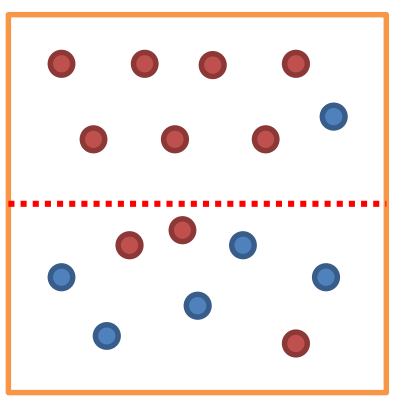

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_data = load_iris()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=156)

In [ ]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

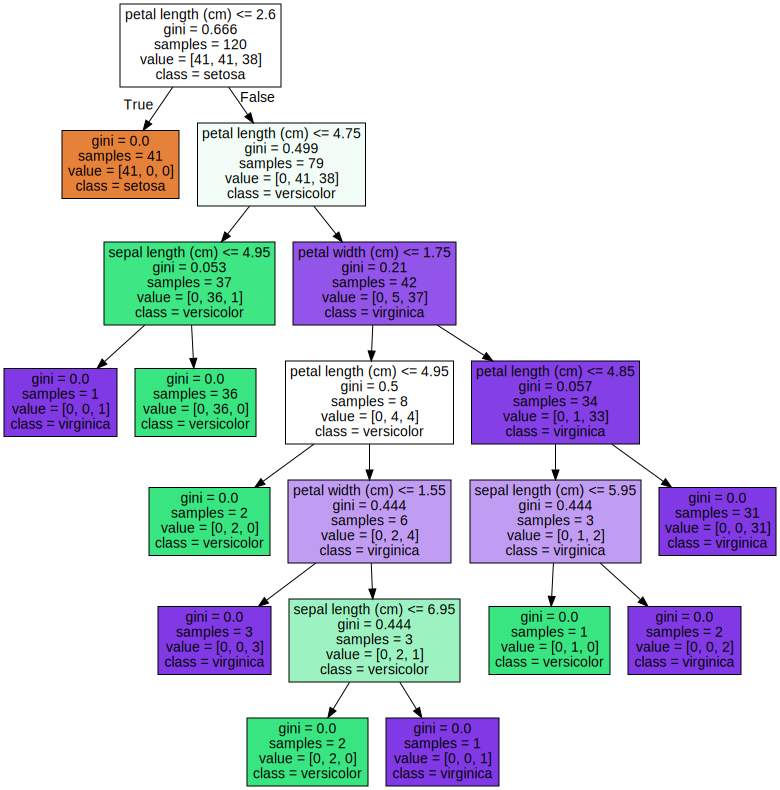

In [ ]:
with open('tree.dot') as f:
    dot_graph =f.read()
graphviz.Source(dot_graph)

In [ ]:
np.round(1-((41/120)**2 + (41/120)**2 + (38/120)**2),3)

0.666

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=4)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=156)

In [ ]:
from sklearn.tree import plot_tree

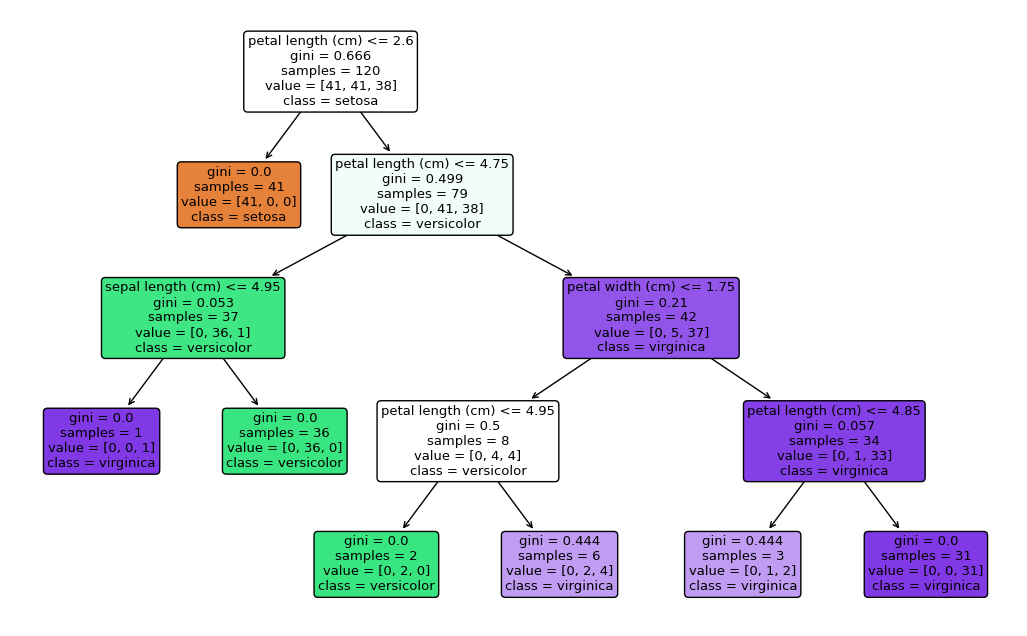

In [ ]:
plt.figure(figsize=(13, 8))
plot_tree(dt_clf, feature_names=list(iris_data.feature_names), class_names=iris_data.target_names,
          rounded=True, filled=True)
plt.show()

# 주요 하이퍼파라미터

min_samples_split: 분할되기 위해 노드가 가져야 최소 샘플 수

min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수

max_features: 각 노드에서 분할에 사용할 특성의 최대 수

max_leaf_nodes: 리프 노드의 최대 수

max_depth : 트리의 최대 깊이 설정

criterion='gini' : 정보의 균일도 측정 방법

In [ ]:
dt_clf.feature_importances_

array([0.02562141, 0.        , 0.93661233, 0.03776626])

<Axes: >

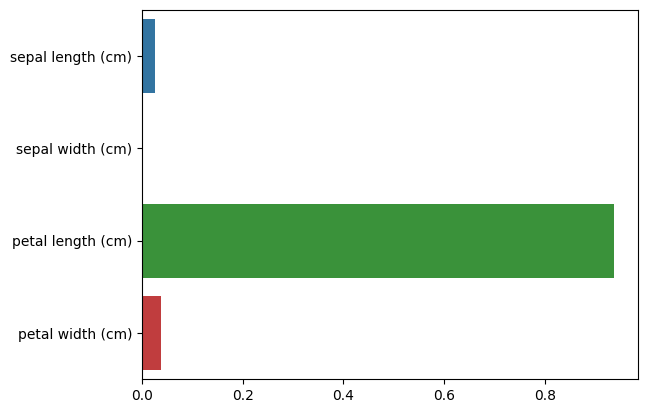

In [ ]:
sns.barplot(x=dt_clf.feature_importances_, y= iris_data.feature_names)

make_classification() : 테스트 데이터 발생기

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X_features, y_labels = make_classification(n_features=2, n_classes=3, n_redundant=0,
                                           n_informative=2, n_clusters_per_class=1,
                                           random_state=0)

In [ ]:
X_features.shape

(100, 2)

In [ ]:
y_labels

array([0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0,
       1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1,
       0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0])

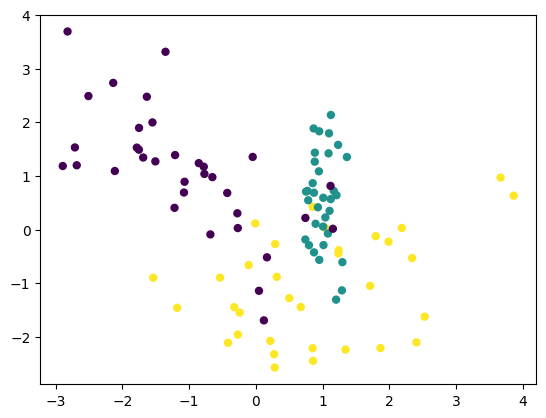

In [ ]:
plt.scatter(X_features[:, 0], X_features[:, 1], c=y_labels, s=25)

In [ ]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

In [ ]:
dt_clf.fit(X_features, y_labels)

DecisionTreeClassifier(max_depth=4, random_state=156)

<ipython-input-137-49a657179d2e>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


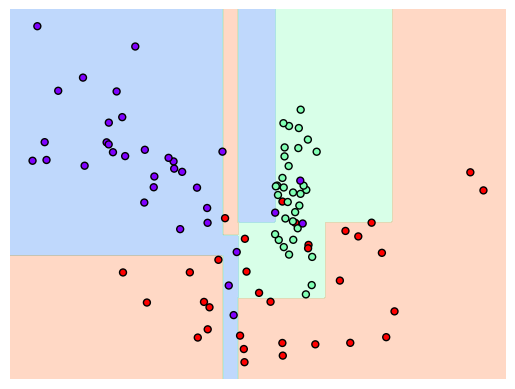

In [ ]:
visualize_boundary(dt_clf, X_features, y_labels)

In [ ]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)

<ipython-input-137-49a657179d2e>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


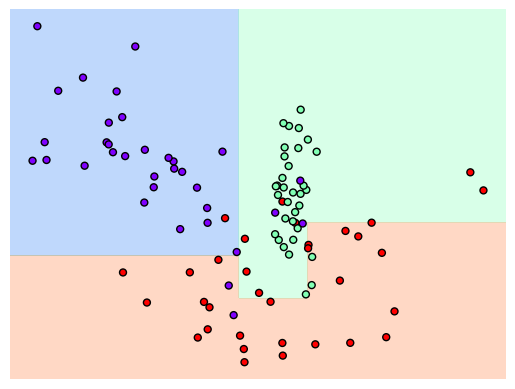

In [ ]:
visualize_boundary(dt_clf, X_features, y_labels)

In [ ]:
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)

<ipython-input-137-49a657179d2e>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


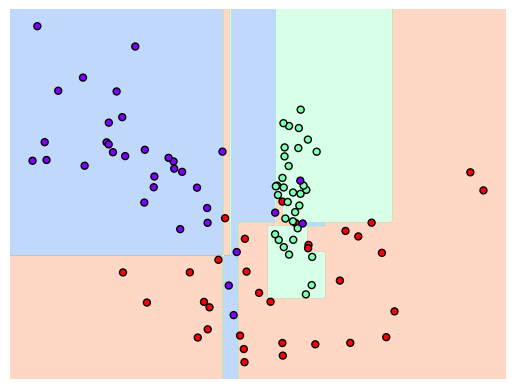

In [ ]:
visualize_boundary(dt_clf, X_features, y_labels)